# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis and Ai\DS\linear regression\Advertising Budget and Sales.csv")
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: >

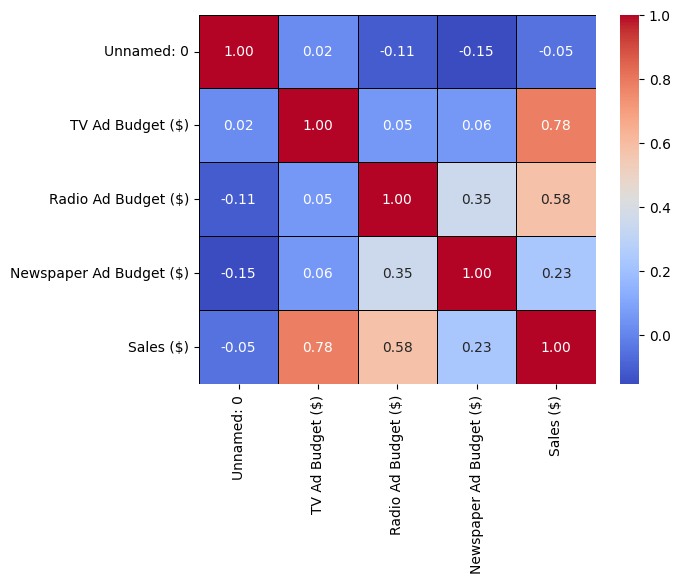

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5, linecolor='black')

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

Unnamed: 0                   int64
TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

<Axes: ylabel='TV Ad Budget ($)'>

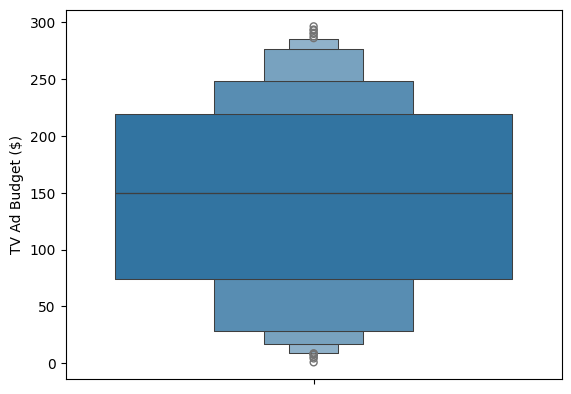

In [27]:
sns.boxenplot(df["TV Ad Budget ($)"])

<Axes: >

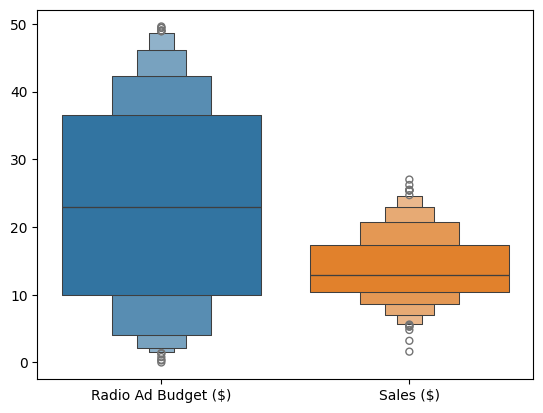

In [28]:
sns.boxenplot(df[["Radio Ad Budget ($)","Sales ($)"]])

<Axes: ylabel='Newspaper Ad Budget ($)'>

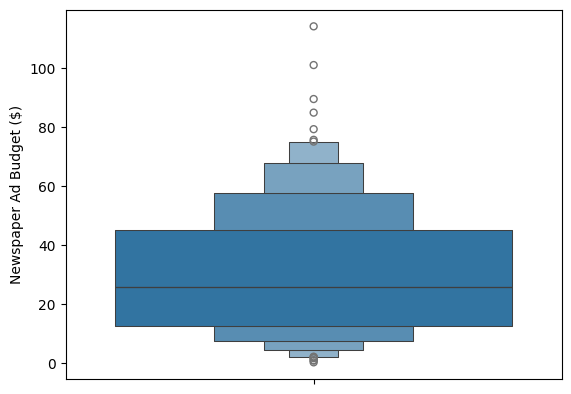

In [22]:
sns.boxenplot(df["Newspaper Ad Budget ($)"])

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV Ad Budget ($)'}>],
       [<Axes: title={'center': 'Radio Ad Budget ($)'}>,
        <Axes: title={'center': 'Newspaper Ad Budget ($)'}>],
       [<Axes: title={'center': 'Sales ($)'}>, <Axes: >]], dtype=object)

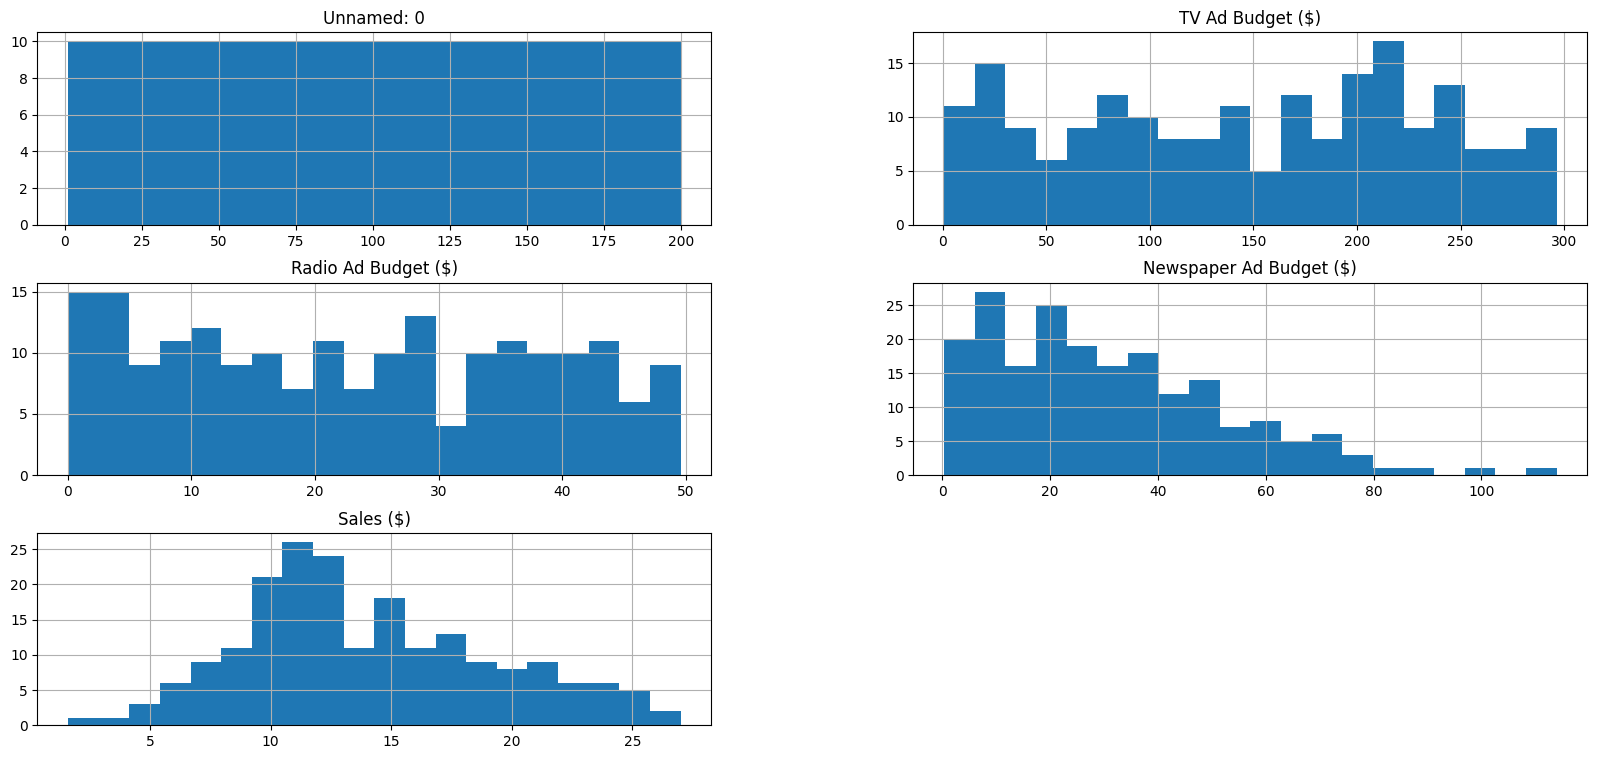

In [18]:
df.hist(figsize=(20,9),bins=20)

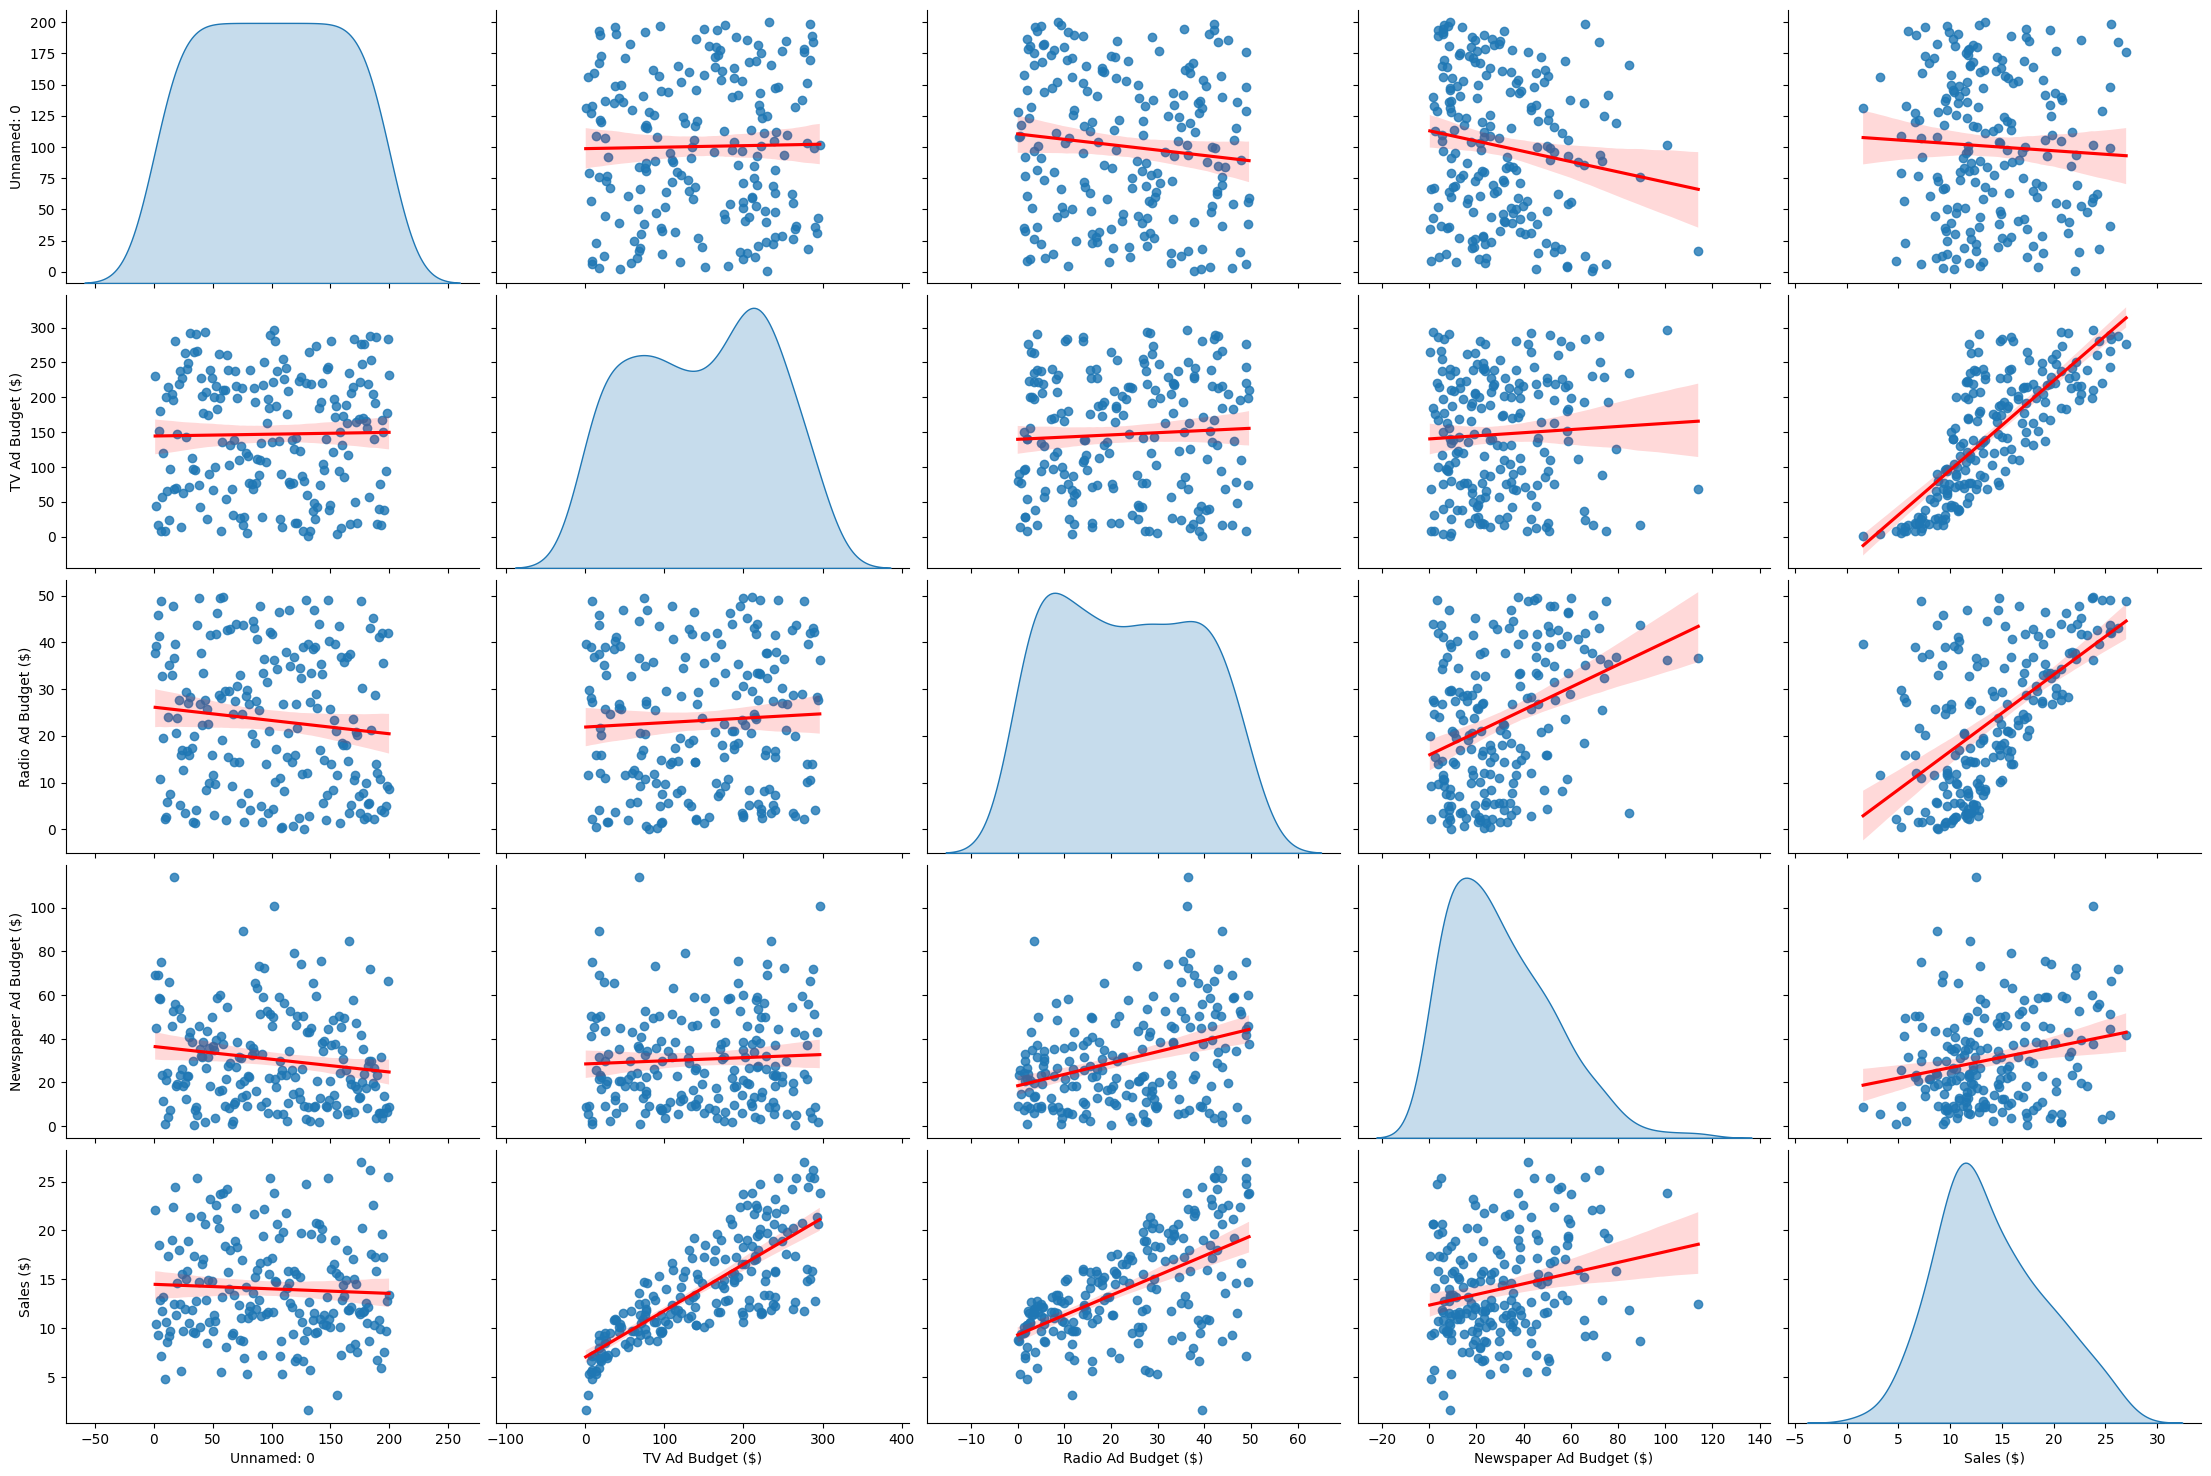

In [21]:
sns.pairplot(df,kind='reg',diag_kind='kde',markers='o',height=3,aspect=1.5,plot_kws={'line_kws':{'color':'red'}})

# Data Preprocessing

#### Data Cleaning

In [30]:
df.sample()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1


In [31]:
df.drop(columns=["Unnamed: 0"], inplace=True)


##### Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split


x = df[["TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)"]]
y = df["Sales ($)"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Model Linear resgression

In [34]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = model.predict(X_test)


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# الحسابات
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# الطباعة
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² Score = {r2:.2f}")


MAE = 1.46
RMSE = 1.78
R² Score = 0.90


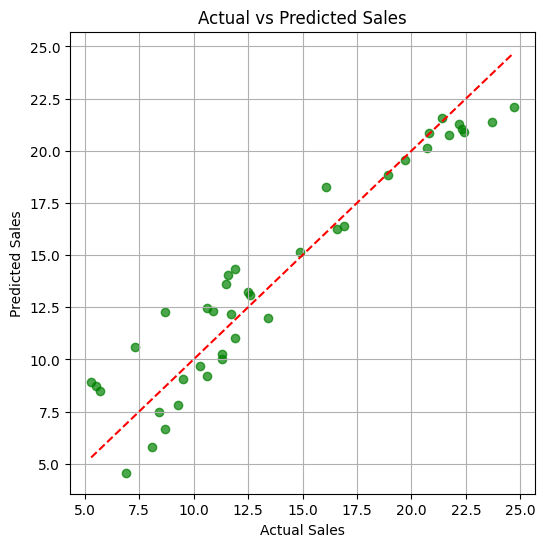

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


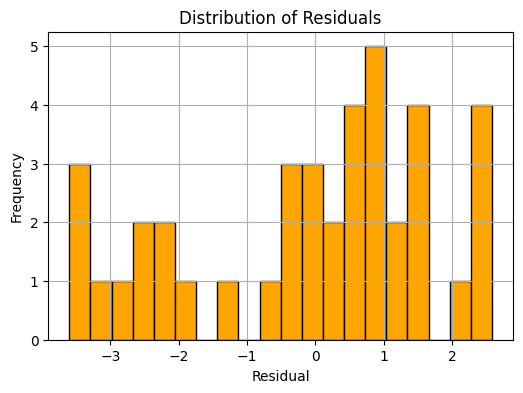

In [42]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [43]:
import joblib

# حفظ النموذج بعد التدريب
joblib.dump(model, "linear_model.pkl")


['linear_model.pkl']